<a href="https://colab.research.google.com/github/SriPradi/MyML/blob/master/classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir= "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [2]:
# Loading MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Assigning variables to the data and label
X, y = mnist.data, mnist.target

In [4]:
# Printing the labels
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
# Displaying the shape  of X
X.shape

(70000, 784)

In [6]:
# User defined function for displaying image
import matplotlib.pyplot as plt
def plot_digit(image_data):
 image = image_data.reshape(28, 28) # resizing to an image size of 28 x 28
 plt.imshow(image, cmap="binary")
 plt.axis("off")

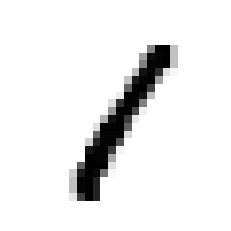

In [7]:
# Displaying a digit
some_digit = X[3]
plot_digit(some_digit)
plt.show()


In [8]:
y[3]

'1'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# splitting data into training and test (last 10,000)

In [10]:
y_train_1 = (y_train == '1') # True for all 1s, False for all other digits; 1's detector
y_test_1 = (y_test == '1')


In [11]:
# Importing SGD classifier 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)


SGDClassifier(random_state=42)

In [12]:
# Predicting a sample test instance
sgd_clf.predict([X_test[9]])

array([False])

In [13]:
# Predicting a sample test instance
sgd_clf.predict([X_test[7]])

array([ True])

In [14]:
y_test # trick to identify indexes of 1s

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [15]:
# measuring accuracy through cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.9878 , 0.98095, 0.99005])

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3) # add shuffle=True if the dataset is
 # not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_1):
 clone_clf = clone(sgd_clf)
 X_train_folds = X_train[train_index]
 y_train_folds = y_train_1[train_index]
 X_test_fold = X_train[test_index]
 y_test_fold = y_train_1[test_index]
 clone_clf.fit(X_train_folds, y_train_folds)
 y_pred = clone_clf.predict(X_test_fold)
 n_correct = sum(y_pred == y_test_fold)
 print(n_correct / len(y_pred)) # prints accuracies

0.9878
0.98095
0.99005


In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_1, y_train_pred)
cm

array([[52917,   341],
       [  483,  6259]])

In [19]:
y_train_perfect_predictions = y_train_1 # pretend we reached perfection
confusion_matrix(y_train_1, y_train_perfect_predictions)

array([[53258,     0],
       [    0,  6742]])

In [20]:
#Precision
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_1, y_train_pred) 

0.9483333333333334

In [21]:
#recall
recall_score(y_train_1, y_train_pred)

0.9283595372293089

In [22]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_train_1, y_train_pred)

0.9382401439064609